In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


***Linear Regression (Tested vs Case)***

[ 56.00484534  -5.90195994  -6.69058166   6.97886154 -10.10794246
  50.09018242 395.50649721 117.51733975  36.81505007  -9.31932074
 132.7640264 ]


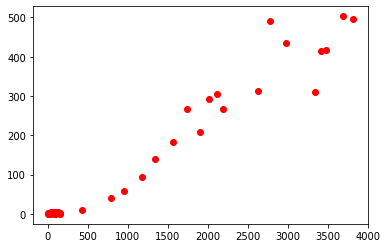

In [3]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv', parse_dates = ['Date'])
dataset
testVSCase = dataset[['Tested','Case']].sort_values('Tested')
test = testVSCase.iloc[:,:-1].values
# print(test)
case = testVSCase.iloc[:,1].values
# print(case)

from sklearn.model_selection import train_test_split

test_train,test_test, case_train, case_test = train_test_split(test,case, test_size = 0.2, random_state = 0)
# print(test_train)
# print(case_train)
# print(test_test)
# print(case_test)
plt.scatter(test_train,case_train, color='red')

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(test_train,case_train)
case_pred = regressor.predict(test_test)
print(case_pred)

In [4]:
case_pred = regressor.predict([[3812]])
case_pred

array([489.61535618])

***MLPRegression Model (Time Series Vs All)***

            Case  Death  Recovered  Tested
Date                                      
2020-04-28  6307    179        148   53936
2020-04-29  6708    190        157   57336
2020-04-30  7108    201        166   60730
2020-05-01  7508    212        175   64123
2020-05-02  7908    223        184   67516
2020-05-03  8307    234        193   70909
2020-05-04  8707    244        202   74302


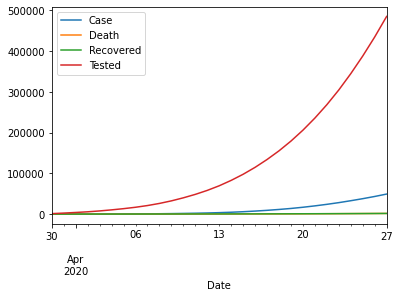

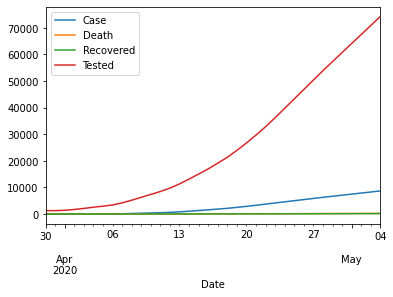

In [5]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
dataset
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
accumulated_count = dataset.cumsum()
x = np.arange(len(dataset)).reshape(-1, 1)
# print(X)
y = dataset.values
# print(y)
# data = data[22:]

from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
regressor.fit(x, y)


test = np.arange(len(dataset)+7).reshape(-1, 1)
pred = regressor.predict(test)
prediction = pred.round().astype(int)
# print(prediction)
import datetime as datetime
import dateutil.parser
week = [dataset.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(dt_idx,name="Date")
# print(predicted_count)
dataFrmae = pd.DataFrame(prediction, columns = ['Case','Day','Death','Recovered','Tested'])

prediction_value = pd.concat([dataFrmae,predicted_count], axis=1)
prediction_value = prediction_value.drop(['Day'], axis=1)
prediction_value.set_index('Date',inplace = True)
accumulated_count = accumulated_count.drop(['Day'], axis=1)
prediction_value.index = pd.to_datetime(prediction_value.index)

accumulated_count.plot()
prediction_value.plot()

updateDateTime = datetime.datetime.now().strftime('%Y-%m-%d')
prediction_value = prediction_value[prediction_value.index >= dateutil.parser.parse(updateDateTime)]
print(prediction_value)
# plt.title('Prediction of Accumulated Confirmed Count')
# plt.legend(['current confirmd count', 'predicted confirmed count'])
# plt.show()

***ARIMA Algorithm***

In [6]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
dataset
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
accumulated_count = dataset.cumsum()
model_case = ARIMA(dataset['Case'].values, order=(1, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_case = forcast_case[0].tolist()
pred_case = [round(num) for num in pred_case]
# pd.DataFrame(pred_case)


In [7]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
dataset
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
# print(dataset['Death'].values)
model_case = ARIMA(dataset['Death'].values, order=(1, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_death = forcast_case[0].tolist()
pred_death = [round(num) for num in pred_death]
# pd.DataFrame(pred_death)

In [8]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
# print(dataset.columns)
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
# print(dataset['Recovered'].values)
model_case = ARIMA(dataset['Recovered'].values, order=(2, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_Recovered = forcast_case[0].tolist()
pred_Recovered = [round(num) for num in pred_Recovered]
# pd.DataFrame(pred_Recovered)

In [9]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
# print(dataset.columns)
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
# dataset = dataset.reset_index()
model_case = ARIMA(dataset['Tested'].values, order=(1, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_test = forcast_case[0].tolist()
pred_test = [round(num) for num in pred_test]
# pd.DataFrame(pred_test)

In [10]:
data = {
    "Case" : pred_case,
    "Death" : pred_death,
    "Recovered": pred_Recovered,
    "Tested" : pred_test
}
dataFrame = pd.DataFrame(data)
# print(dataFrame)
week = [dataset.index[dataset.shape[0]-1] + timedelta(days=i) for i in range(1,8)]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(dt_idx,name="Date")
prediction_value = pd.concat([dataFrame,predicted_count], axis=1)
prediction_value.set_index('Date',inplace = True)
print(prediction_value)

            Case  Death  Recovered  Tested
Date                                      
2020-04-28  6420    161        135   54421
2020-04-29  6944    171        142   58436
2020-04-30  7487    181        150   62581
2020-05-01  8049    192        158   66862
2020-05-02  8632    203        165   71283
2020-05-03  9235    214        173   75845
2020-05-04  9858    226        182   80549
